In [109]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split

In [31]:
train=pd.read_csv('../input/nlp-getting-started/train.csv')
test=pd.read_csv('../input/nlp-getting-started/test.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [32]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [33]:
print("Total training samples:",len(train['id']))
print("Total testing samples:", len(test['id']))

Total training samples: 7613
Total testing samples: 3263


In [34]:
print("Missing keywords in training:",train['keyword'].isnull().sum())
print("Missing keywords in testing:", test['keyword'].isnull().sum())

Missing keywords in training: 61
Missing keywords in testing: 26


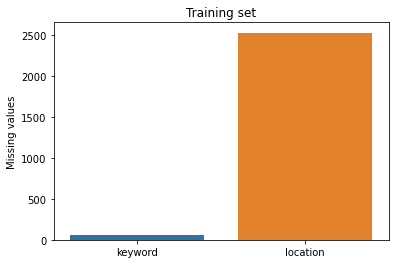

In [35]:
missing_col=['keyword','location']
ax=sns.barplot(x=missing_col, y=train[missing_col].isnull().sum())
ax.set_title('Training set')
ax.set_ylabel('Missing values')

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

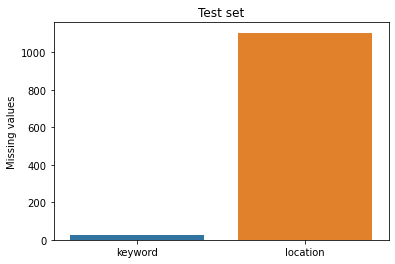

In [36]:
ax=sns.barplot(x=missing_col, y=test[missing_col].isnull().sum())
ax.set_title('Test set')
ax.set_ylabel('Missing values')
plt.show

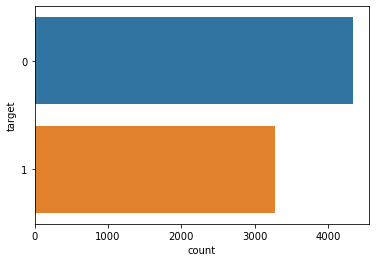

In [37]:
sns.countplot(y=train['target'])

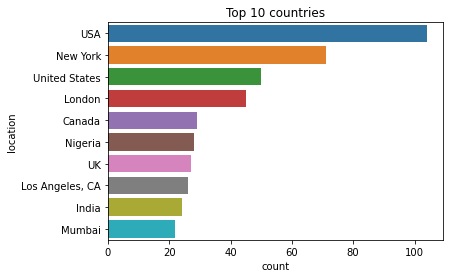

In [38]:
sns.countplot(y=train['location'], order=train['location'].value_counts().iloc[:10].index)
plt.title('Top 10 countries')
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

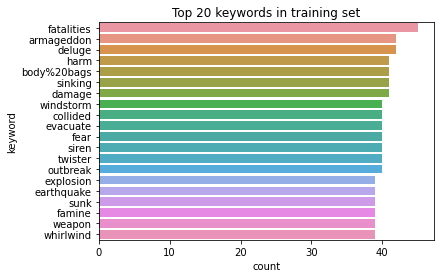

In [39]:
sns.countplot(y=train['keyword'], order=train['keyword'].value_counts().iloc[:20].index)
plt.title('Top 20 keywords in training set')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

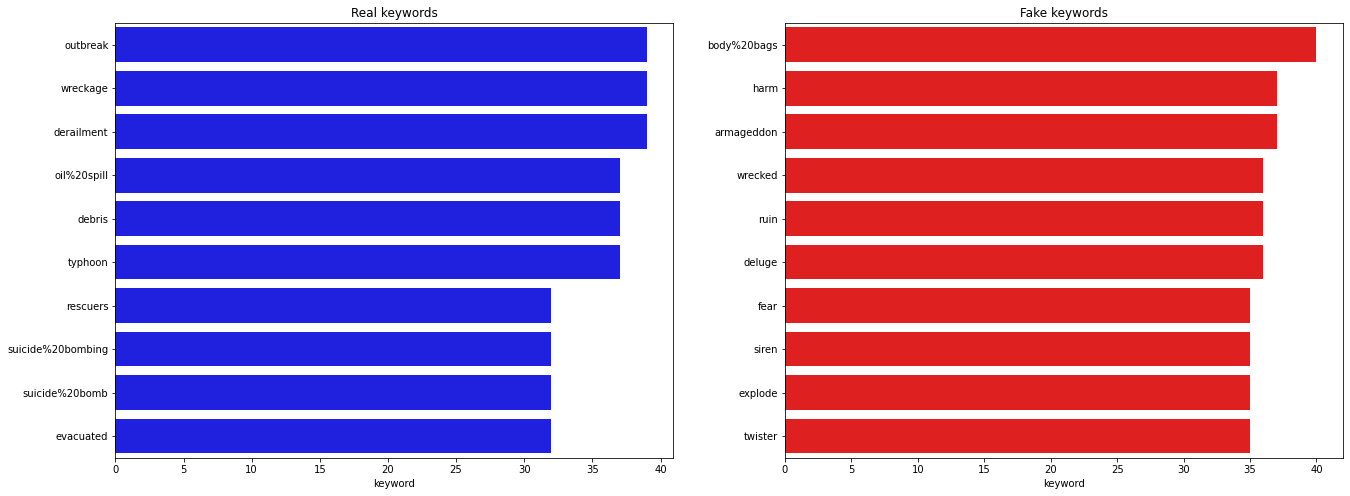

In [40]:
kw=train[train['target']==1]['keyword'].value_counts().head(10)
kw1=train[train['target']==0]['keyword'].value_counts().head(10)
plt.figure(figsize=(22,8))
plt.subplot(121)
sns.barplot(kw, kw.index, color='b')
plt.title('Real keywords')
plt.subplot(122)
sns.barplot(kw1, kw1.index, color='r')
plt.title('Fake keywords')
plt.show

In [41]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [42]:
train['clean_text']='NaN'
train.head()

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,NaN
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,NaN
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,NaN
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,NaN
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,NaN


In [43]:
i=0
for sentence in train['text']:
    train['clean_text'][i]=clean_text(sentence)
    i=i+1
    
train.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


In [44]:
test['clean_text']='NaN'
i=0
for sentence in test['text']:
    test['clean_text'][i]=clean_text(sentence)
    i=i+1
    
test.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,keyword,location,text,clean_text
0,0,NaN,NaN,Just happened a terrible car crash,just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard about earthquake is different cities sta...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are ...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills in china and taiwan


In [45]:
number=0
for sentence in train['clean_text']:
    if len(sentence)>number:
        number=len(sentence)
    else:
        continue
print(number)
    

145


In [46]:
train['keyword'].fillna('Unknown', inplace = True) 
train.head()

,id,keyword,location,text,target,clean_text
0,1,Unknown,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,Unknown,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,Unknown,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,Unknown,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,7,Unknown,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


In [47]:
test['keyword'].fillna('Unknown',inplace=True)
test.head()

,id,keyword,location,text,clean_text
0,0,Unknown,NaN,Just happened a terrible car crash,just happened a terrible car crash
1,2,Unknown,NaN,"Heard about #earthquake is different cities, s...",heard about earthquake is different cities sta...
2,3,Unknown,NaN,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are ...
3,9,Unknown,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires
4,11,Unknown,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills in china and taiwan


In [48]:
train['final_text']='NaN'
train['final_text']=train['clean_text']+train['keyword']
train.head(10)

,id,keyword,location,text,target,clean_text,final_text
0,1,Unknown,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,our deeds are the reason of this earthquake ma...
1,4,Unknown,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,forest fire near la ronge sask canadaUnknown
2,5,Unknown,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,all residents asked to shelter in place are be...
3,6,Unknown,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...,people receive wildfires evacuation orders in...
4,7,Unknown,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,just got sent this photo from ruby alaska as s...
5,8,Unknown,NaN,#RockyFire Update => California Hwy. 20 closed...,1,rockyfire update california hwy closed in bo...,rockyfire update california hwy closed in bo...
6,10,Unknown,NaN,#flood #disaster Heavy rain causes flash flood...,1,flood disaster heavy rain causes flash floodin...,flood disaster heavy rain causes flash floodin...
7,13,Unknown,NaN,I'm on top of the hill and I can see a fire in...,1,im on top of the hill and i can see a fire in ...,im on top of the hill and i can see a fire in ...
8,14,Unknown,NaN,There's an emergency evacuation happening now ...,1,theres an emergency evacuation happening now i...,theres an emergency evacuation happening now i...
9,15,Unknown,NaN,I'm afraid that the tornado is coming to our a...,1,im afraid that the tornado is coming to our area,im afraid that the tornado is coming to our ar...


In [49]:
test['final_text']='NaN'
test['final_text']=test['clean_text']+test['keyword']
test.head()

,id,keyword,location,text,clean_text,final_text
0,0,Unknown,NaN,Just happened a terrible car crash,just happened a terrible car crash,just happened a terrible car crashUnknown
1,2,Unknown,NaN,"Heard about #earthquake is different cities, s...",heard about earthquake is different cities sta...,heard about earthquake is different cities sta...
2,3,Unknown,NaN,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are ...,there is a forest fire at spot pond geese are ...
3,9,Unknown,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires,apocalypse lighting spokane wildfiresUnknown
4,11,Unknown,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills in china and taiwan,typhoon soudelor kills in china and taiwanUnk...


In [50]:
data=train['final_text'].values
valid_data=test['final_text'].values

In [51]:
target=train['target'].values

In [163]:
X_train, X_test, Y_train, Y_test= train_test_split(data, target,test_size=0.1, random_state=42)

In [164]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(6851,) (6851,)
(762,) (762,)


In [165]:
tokenizer=Tokenizer(num_words=3000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
word_index=tokenizer.word_index
sequences=tokenizer.texts_to_sequences(X_train)
padded_train=pad_sequences(sequences,160,truncating='post')

In [166]:
print(padded_train.shape)

(6851, 160)


In [167]:
sequences_test=tokenizer.texts_to_sequences(X_test)
padded_test=pad_sequences(sequences_test,160,truncating='post')

In [210]:
model= tf.keras.Sequential([
    tf.keras.layers.Embedding(3000,32,input_length=160),
    tf.keras.layers.SpatialDropout1D(0.4),
    
    tf.keras.layers.LSTM(64, return_sequences=True),#added for 3rd sub
    tf.keras.layers.LSTM(32),
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [211]:
opt=keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_36 (Embedding)     (None, 160, 32)           96000     
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 160, 32)           0         
_________________________________________________________________
lstm_54 (LSTM)               (None, 160, 64)           24832     
_________________________________________________________________
lstm_55 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_25 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_65 (Dense)             (None, 1)               

In [212]:
history=model.fit(padded_train, Y_train, epochs=10, validation_data=(padded_test, Y_test),batch_size=32)

Train on 6851 samples, validate on 762 samples
Epoch 1/10
6851/6851 [==============================] - 7s 1ms/sample - loss: 0.6862 - accuracy: 0.5700 - val_loss: 0.6808 - val_accuracy: 0.5591
Epoch 2/10
6851/6851 [==============================] - 4s 565us/sample - loss: 0.6702 - accuracy: 0.5750 - val_loss: 0.6534 - val_accuracy: 0.5866
Epoch 3/10
6851/6851 [==============================] - 4s 584us/sample - loss: 0.6018 - accuracy: 0.7063 - val_loss: 0.5375 - val_accuracy: 0.7480
Epoch 4/10
6851/6851 [==============================] - 4s 538us/sample - loss: 0.4963 - accuracy: 0.7847 - val_loss: 0.4951 - val_accuracy: 0.7874
Epoch 5/10
6851/6851 [==============================] - 4s 538us/sample - loss: 0.4485 - accuracy: 0.8069 - val_loss: 0.4753 - val_accuracy: 0.7913
Epoch 6/10
6851/6851 [==============================] - 4s 577us/sample - loss: 0.4157 - accuracy: 0.8260 - val_loss: 0.4662 - val_accuracy: 0.7927
Epoch 7/10
6851/6851 [==============================] - 4s 548us/sa

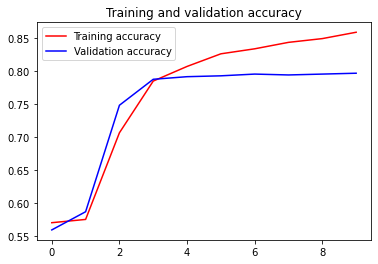

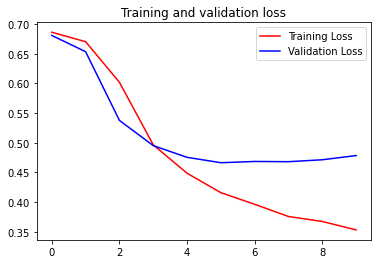

In [213]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [214]:
sequences_valid=tokenizer.texts_to_sequences(valid_data)
padded_valid=pad_sequences(sequences_valid,160,truncating='post')

In [215]:
results=model.predict(padded_valid)

In [216]:
results=results.round()

In [217]:
results = np.array(results, dtype='int')

In [218]:
sub=pd.DataFrame()
sub['id']=test['id']
sub.head()

,id
0,0
1,2
2,3
3,9
4,11


In [219]:
sub['target']=results
sub.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1


In [220]:
sub.to_csv('submission4.csv', index=False)

In [221]:
from collections import Counter
Counter(sub['target'])

Counter({0: 2199, 1: 1064})